# LinkedIn Sentiment Analysis

LinkedIn sentiment analysis to analyse the positive, negative and neutral cold messages sent on the platform to reach out for new opportunities. The notebook gives a list of top message threads which received a successful reply to the cold message.

In [1]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import re

# Load the CSV file containing text messages
csv_file_path = "/content/messages_blanks.csv"
data = pd.read_csv(csv_file_path)

# Column containing text messages
text_column = "CONTENT"

# Function to remove unexpected characters
def clean_text(text):
    # Remove non-ASCII characters
    text = text.encode("ascii", "ignore").decode()
    # Remove special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    # Remove extra spaces
    text = " ".join(text.split())
    return text

# Apply the cleaning function to the text column
data[text_column] = data[text_column].apply(clean_text)

# Save the cleaned DataFrame to a new CSV file
cleaned_csv_file_path = "cleaned_messages.csv"
data.to_csv(cleaned_csv_file_path, index=False)

print("Text cleaning completed. Cleaned data saved to", cleaned_csv_file_path)


Text cleaning completed. Cleaned data saved to cleaned_messages.csv


In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the CSV file containing text messages
csv_file_path = "/content/messages_blanks.csv"
data = pd.read_csv(csv_file_path)

# Initialize the VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Function to determine sentiment category
def get_sentiment_category(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Perform sentiment analysis on each text message
sentiment_results = []
for message in data['CONTENT']:
    sentiment_scores = analyzer.polarity_scores(message)
    sentiment_category = get_sentiment_category(sentiment_scores['compound'])
    sentiment_results.append(sentiment_category)

# Add sentiment results to the DataFrame
data['sentiment'] = sentiment_results

# Save the updated DataFrame to a new CSV file
output_csv_file_path = "messages_with_sentiment.csv"
data.to_csv(output_csv_file_path, index=False)

print("Sentiment analysis completed. Results saved to", output_csv_file_path)


Sentiment analysis completed. Results saved to messages_with_sentiment.csv


In [4]:
print(data[['CONTENT', 'sentiment']])

                                               CONTENT sentiment
0    <p class="spinmail-quill-editor__spin-break">H...  Positive
1    <p class="spinmail-quill-editor__spin-break">H...  Positive
2    I'm Mohammad Zaeem, a pre-final year B.Tech st...  Positive
3    I'm Mohammad Zaeem, a pre-final year B.Tech st...  Positive
4    I am writing to express my interest in the rol...  Positive
..                                                 ...       ...
530  <p class="spinmail-quill-editor__spin-break">H...  Positive
531  Hi %FIRSTNAME%, I’m Sundeep, Head of Service C...  Positive
532  <p class="spinmail-quill-editor__spin-break">H...  Positive
533  <p class="spinmail-quill-editor__spin-break">H...  Positive
534  <p class="spinmail-quill-editor__spin-break">H...  Positive

[535 rows x 2 columns]


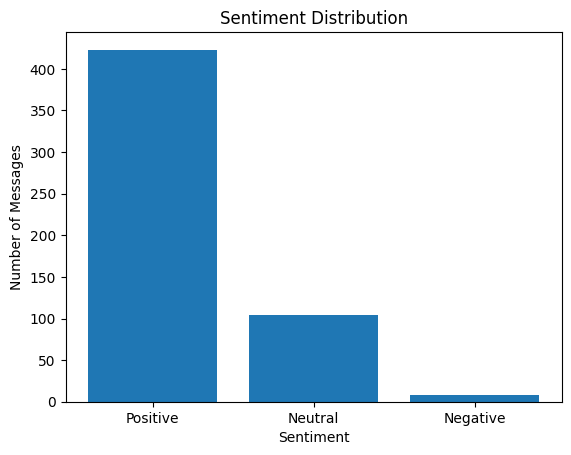

In [5]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each sentiment category
sentiment_counts = data['sentiment'].value_counts()

# Create a bar chart
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.title("Sentiment Distribution")
plt.show()

In [6]:
# Filter out messages sent by "Mohammad Zaeem"
response_candidates = data[data['FROM'] != "Mohammad Zaeem"]

# Create a dictionary to store conversations
conversations = {}

# Iterate through each response candidate message
for index, row in response_candidates.iterrows():
    message_id = row['CONVERSATION ID']
    text = row['CONTENT']
    sender = row['FROM']

    # Check previous messages for potential original messages (not sent by "Mohammad Zaeem")
    for cid, conversation in conversations.items():
        original_message_sender = conversation[0]['FROM']
        if original_message_sender == sender:
            conversations[cid].append({
                'CONVERSATION ID': message_id,
                'CONTENT': text
            })
            break
    else:
        # Create a new conversation with the response candidate as the original message
        conversations[message_id] = [{
            'CONVERSATION ID': message_id,
            'CONTENT': text,
            'FROM': sender
        }]

# Print conversations and their responses
for conversation_id, conversation in conversations.items():
    print(f"Conversation ID: {conversation_id}")
    for message_info in conversation:
        print(f"Message ID: {message_info['CONVERSATION ID']}")
        # print(f"Sender: {message_info['FROM']}")
        # print(f"Text: {message_info['CONTENT']}")
        print("-" * 30)

Conversation ID: 2-YzIzMzI4OTctMzMxMC00NjNjLTkwZmMtYzFkZGM1NThhMjlkXzAxMw==
Message ID: 2-YzIzMzI4OTctMzMxMC00NjNjLTkwZmMtYzFkZGM1NThhMjlkXzAxMw==
------------------------------
Message ID: 2-N2M4YzEzNmYtMWNiMS00OWE3LTg5MTEtODkxN2ZhNjM1ZTRmXzAxMw==
------------------------------
Message ID: 2-OTk1ZTAyOGYtYmQ1My00ZjJmLTgyYzYtNmVjZjg0NTUwYWUyXzAxMA==
------------------------------
Message ID: 2-OTk1ZTAyOGYtYmQ1My00ZjJmLTgyYzYtNmVjZjg0NTUwYWUyXzAxMA==
------------------------------
Message ID: 2-OTk1ZTAyOGYtYmQ1My00ZjJmLTgyYzYtNmVjZjg0NTUwYWUyXzAxMA==
------------------------------
Message ID: 2-OTk1ZTAyOGYtYmQ1My00ZjJmLTgyYzYtNmVjZjg0NTUwYWUyXzAxMA==
------------------------------
Message ID: 2-ZDdjODA0MTEtODVkYi00YmE5LTkwOTgtZDRiNTQxYTkyYmY1XzAxMA==
------------------------------
Message ID: 2-ZGRjNDlmMmEtZDU5Mi00MWY2LTkwZTQtZGY5YWRhMjhlYTY3XzAxMA==
------------------------------
Message ID: 2-NzI4ZGEyZTgtMDk3Yy00YTg1LWJjMGUtYTI4MTYyNmIwZTM3XzAxMA==
------------------------------
Messag

In [7]:
# Sort conversations by the number of messages in descending order
sorted_conversations = sorted(conversations.items(), key=lambda x: len(x[1]), reverse=True)

# Display the content of the top ten conversation threads and their responses
for idx, (conversation_id, conversation) in enumerate(sorted_conversations[:5]):
    print(f"Top Conversation #{idx + 1}")
    print("-" * 50)
    for message_info in conversation:
        print(f"Message: {message_info['CONTENT']}")
        print("-" * 20)
    print("\n")


Top Conversation #1
--------------------------------------------------
Message: <p class="spinmail-quill-editor__spin-break">Hi %FIRSTNAME%! </p><p class="spinmail-quill-editor__spin-break"><br></p><p class="spinmail-quill-editor__spin-break">I'm Aastha from Hero Vired, and I'm excited to present our Advanced Certification Program in Data Science &amp; Analytics, in collaboration with The University of Chicago. Let's discuss how this program can empower you with advanced data analysis skills, real-world projects, and industry mentorship.</p><p class="spinmail-quill-editor__spin-break"><br></p><p class="spinmail-quill-editor__spin-break">Program Highlights</p><p class="spinmail-quill-editor__spin-break">🔸Live, instructor-led classes by the University of Chicago faculty</p><p class="spinmail-quill-editor__spin-break">🔸Personalized career guidance, placement assistance, and career advancement sessions</p><p class="spinmail-quill-editor__spin-break">🔸Certification from Hero Vired in collab